# 基于频数方式实现trigram

In [163]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
import torch

In [5]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)
N

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [15]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [17]:
itos[0]

'.'

In [19]:
print (type(enumerate(chars)))

for i,s in enumerate(chars):
    print (i,s)



<class 'enumerate'>
0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j
10 k
11 l
12 m
13 n
14 o
15 p
16 q
17 r
18 s
19 t
20 u
21 v
22 w
23 x
24 y
25 z


In [21]:
a = 'whoisyourdaddy'
b = set(a)

# for i,s in enumerate(b):
#     print(i,s)

c = {s:i+1 for i,s in enumerate(b)}
c['.']=0
c

{'a': 1,
 'y': 2,
 's': 3,
 'r': 4,
 'w': 5,
 'h': 6,
 'i': 7,
 'd': 8,
 'u': 9,
 'o': 10,
 '.': 0}

In [23]:

for w in words:
  chs = ['.', '.'] + list(w) + ['.']
  for ch1, ch2,ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2, ix3] += 1
    

In [24]:
N[0][0][3]

tensor(1542, dtype=torch.int32)

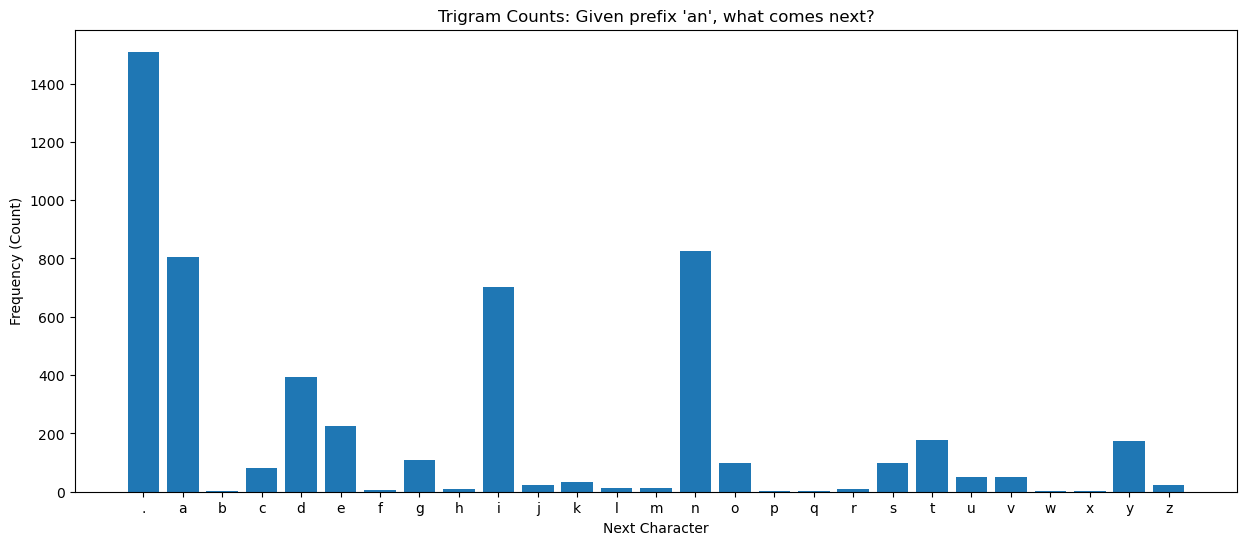

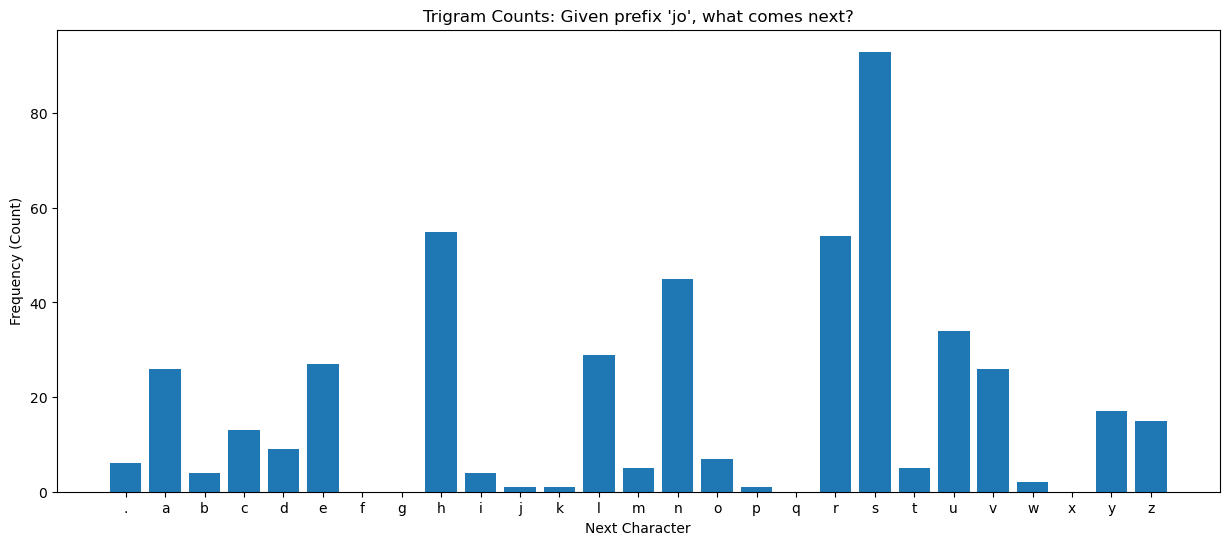

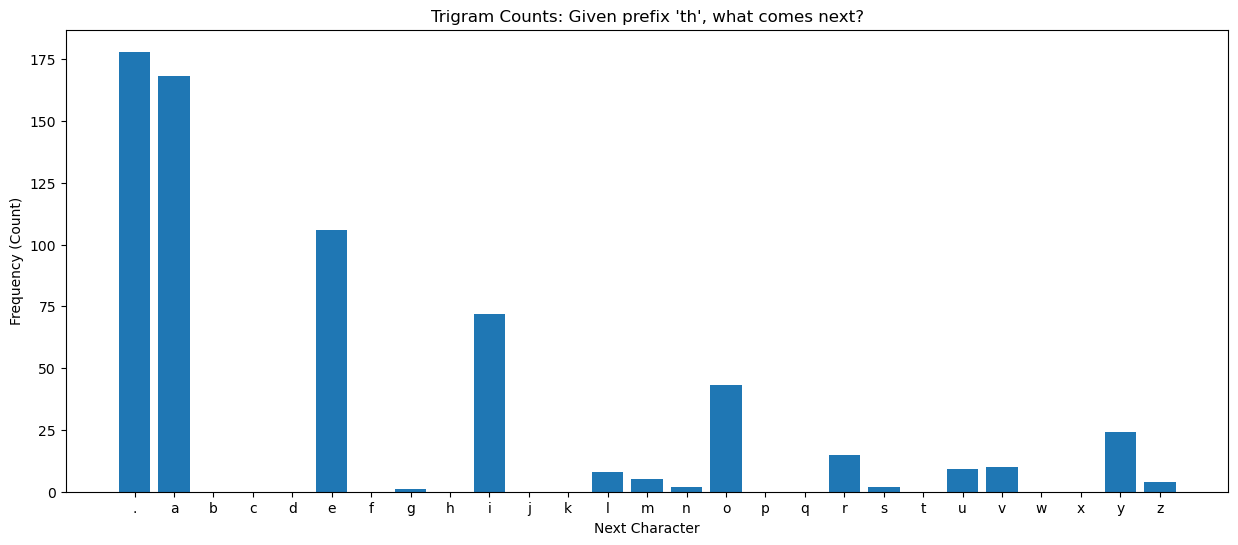

提示：前缀 'qz' 在训练数据中从未出现过。


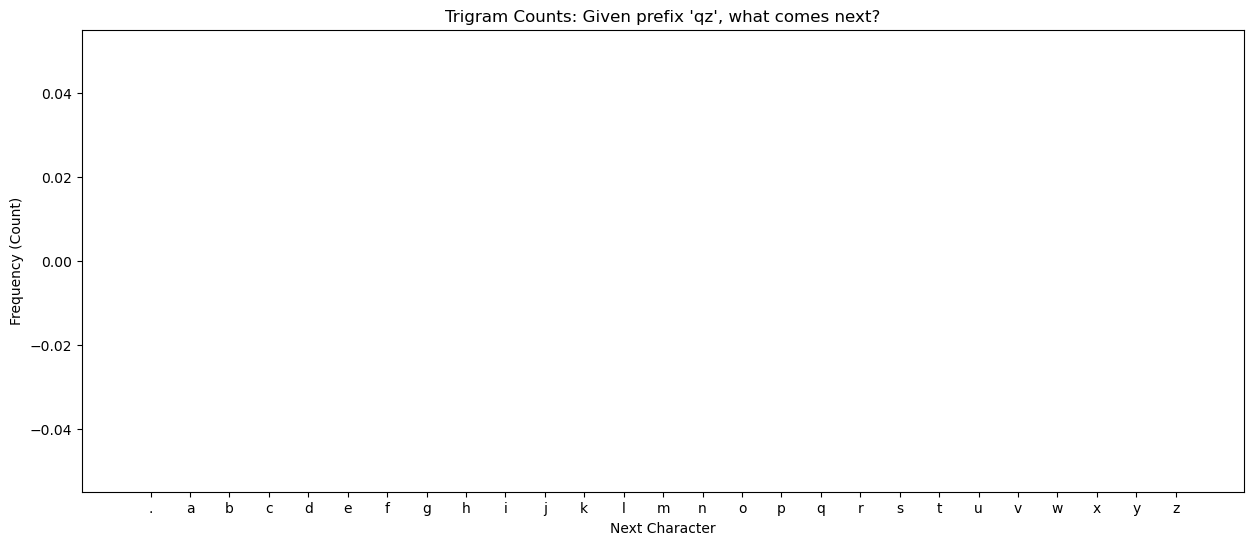

In [25]:

import matplotlib.pyplot as plt
%matplotlib inline
# 假设你的三元频数矩阵叫 N_tri (一个 [27, 27, 27] 的 PyTorch Tensor)
# 假设你的 itos 字典已经存在
# 假设你的 stoi 字典已经存在

def visualize_trigram_counts(prefix):
    """
    可视化给定二元前缀 (prefix) 后，第三个字符的频数分布。
    """
    # 1. 检查输入
    if len(prefix) != 2:
        print("错误：前缀必须是 2 个字符长。")
        return
    
    # 2. 将前缀转换为索引
    ix1 = stoi.get(prefix[0])
    ix2 = stoi.get(prefix[1])
    
    if ix1 is None or ix2 is None:
        print(f"错误：字符 '{prefix}' 不在字典中。")
        return

    # 3. 从 3D 矩阵中“切”出我们关心的一维向量
    # 这就是 N[ix1, ix2, :]
    counts_vector = N[ix1, ix2, :]
    
    # 4. 如果这个前缀从没出现过，所有频数都为 0
    if counts_vector.sum() == 0:
        print(f"提示：前缀 '{prefix}' 在训练数据中从未出现过。")

    # 5. 准备绘图
    # x 轴标签 ('.', 'a', 'b', ..., 'z')
    labels = [itos[i] for i in range(27)]
    
    plt.figure(figsize=(15, 6)) # 画布可以宽一点
    plt.bar(labels, counts_vector.numpy()) # 使用条形图
    
    # 6. 设置标题和标签
    plt.title(f"Trigram Counts: Given prefix '{prefix}', what comes next?")
    plt.xlabel("Next Character")
    plt.ylabel("Frequency (Count)")
    plt.show()

# --- 现在来测试一下！---

# 看看 'an' 后面最常跟什么？
visualize_trigram_counts('an')

# 看看 'jo' 后面最常跟什么？
visualize_trigram_counts('jo')

# 看看 'th' 后面最常跟什么？
visualize_trigram_counts('th')

# 看看一个不存在的组合，比如 'qz'
visualize_trigram_counts('qz')

In [26]:
# N_tri 是你 [27, 27, 27] 的频数矩阵
# 我们给 *每一个* 单元格都 +1
N_tri_smooth = N + 1

# N_tri_smooth.sum(dim=2) 会得到一个 [27, 27] 的矩阵
# 我们使用 keepdim=True，它会保持维度，得到 [27, 27, 1]
# 这对于下一步的“广播” (broadcasting) 除法至关重要
counts_sum = N_tri_smooth.sum(dim=2, keepdim=True)
print (counts_sum.size())


torch.Size([27, 27, 1])


In [45]:
# 确保两者都是浮点数，以进行精确的除法
P_tri = N_tri_smooth.float() / counts_sum.float()

In [47]:
# 假设你的“概率大脑” P_tri (形状 [27, 27, 27]) 已经准备好了
# 假设你的 itos (索引到字符串) 字典也准备好了

# 1. 初始化一个可复现的随机数生成器
g = torch.Generator().manual_seed(2147483647)

print("--- 10个用三元模型（计数法）生成的名字 ---")

# 2. 循环生成 10 个名字
for _ in range(10):
    
    out = [] # 存储当前正在生成的词
    
    # 3. 初始化上下文 (context)
    # 我们从 (., .) 上下文开始 (索引 0 和 0)
    context1 = 0
    context2 = 0
    
    while True:
        # 4. 从“概率矩阵” P_tri 中查表 (超快！)
        # p 是一个 27 维的向量，它已经是归一化好的概率了
        p = P_tri[context1, context2]
        
        # 5. 采样 (Sampling)
        # 根据 p 的概率分布，随机抽取一个索引
        ix = torch.multinomial(p, 
                              num_samples=1, 
                              replacement=True, 
                              generator=g).item()
        
        # 6. 检查退出条件
        # 如果采样到了 '.' (索引 0)，说明这个词结束了
        if ix == 0:
            break
            
        # 7. 记录结果
        out.append(itos[ix])
        
        # 8. “滑动”上下文窗口 (关键！)
        # 之前的 context2 变成了新的 context1
        # 刚刚采样的 ix 变成了新的 context2
        context1 = context2
        context2 = ix
        
    print(''.join(out)) # 打印完整的词
    # print(out) # 打印完整的词

--- 10个用三元模型（计数法）生成的名字 ---
junide
jakasid
prelay
adin
kairritoper
sathen
sameia
yanileniassibduinrwin
lessiyanayla
te


In [51]:
log_likelihood = 0.0
n = 0
stock = []
for w in words:
    chs = ['.', '.'] + list(w) + ['.']
    p = 1
    for ch1, ch2,ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        prob = pp[ix1, ix2, ix3]
        log_likelihood +=torch.log(prob)
        n +=1
    stock.append(log_likelihood.item())
    # print (log_likelihood.item())
nll = -log_likelihood / n
print (nll)

tensor(2.2120)


# 神经网络方式:沿用原视频里的迭代过程来逐步实现trigram

## create the training set of bigrams (x,y)


In [55]:
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    print(ch1, ch2, ch3)
    xs.append([ix1, ix2])
    ys.append(ix3)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. . e
. e m
e m m
m m a
m a .


In [57]:
xs

tensor([[ 0,  0],
        [ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1]])

In [59]:
ys

tensor([ 5, 13, 13,  1,  0])

In [61]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0.,

In [63]:
xenc.shape

torch.Size([5, 2, 27])

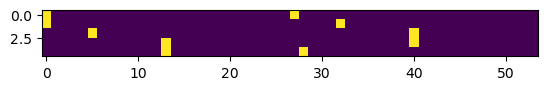

In [65]:
plt.imshow(xenc.view(-1,54))
plt.show()

In [67]:
xenc.dtype

torch.float32

In [69]:
xenc.shape

torch.Size([5, 2, 27])

In [71]:
xenc = xenc.view(-1,54)
xenc.shape

torch.Size([5, 54])

In [73]:
W = torch.randn((54, 27))
xenc @ W



tensor([[ 0.2497,  2.2127,  2.4935,  1.6872, -0.3744,  1.3352,  2.2260, -3.4369,
          1.0593, -1.7315,  0.5394,  0.0269, -0.1579, -0.9514,  2.2161, -1.4844,
          0.9939, -1.3708,  2.3137,  0.1367, -1.6004,  2.5926, -0.7678,  1.8294,
         -1.1155,  0.6601, -2.1656],
        [ 0.2508, -0.5517,  1.1171,  2.6042,  0.9981, -0.7366,  0.0602, -2.8534,
          2.3876, -0.8486,  0.6909, -1.1080, -0.9645,  0.0236,  0.4791,  0.0200,
         -1.1673, -1.8785,  1.5258,  0.9598, -1.0952,  0.6040, -0.6803,  2.0535,
         -0.8089, -0.5818,  1.1547],
        [ 0.7432,  0.7872,  0.2518, -1.6613, -1.0853,  0.7563,  1.7156, -0.3610,
          0.9676,  1.0508, -2.8162,  0.4316,  2.5456, -2.4523, -0.8018, -1.2982,
         -0.8092, -0.9900,  0.4623, -0.6485, -1.5152, -0.5788, -0.1915,  0.7136,
          1.7213,  1.2436, -1.2367],
        [ 0.5423, -1.4799, -2.2322, -0.8141,  1.2075,  1.9829, -0.0128,  2.1497,
          1.4758,  0.7073, -0.8620, -0.6041,  1.9001, -2.3484, -1.8625, -0.9670

In [75]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0135, 0.0962, 0.1274, 0.0569, 0.0072, 0.0400, 0.0975, 0.0003, 0.0304,
         0.0019, 0.0181, 0.0108, 0.0090, 0.0041, 0.0965, 0.0024, 0.0284, 0.0027,
         0.1064, 0.0121, 0.0021, 0.1407, 0.0049, 0.0656, 0.0034, 0.0204, 0.0012],
        [0.0205, 0.0092, 0.0487, 0.2155, 0.0432, 0.0076, 0.0169, 0.0009, 0.1735,
         0.0068, 0.0318, 0.0053, 0.0061, 0.0163, 0.0257, 0.0163, 0.0050, 0.0024,
         0.0733, 0.0416, 0.0053, 0.0292, 0.0081, 0.1242, 0.0071, 0.0089, 0.0506],
        [0.0412, 0.0430, 0.0252, 0.0037, 0.0066, 0.0417, 0.1089, 0.0136, 0.0515,
         0.0560, 0.0012, 0.0301, 0.2496, 0.0017, 0.0088, 0.0053, 0.0087, 0.0073,
         0.0311, 0.0102, 0.0043, 0.0110, 0.0162, 0.0400, 0.1095, 0.0679, 0.0057],
        [0.0266, 0.0035, 0.0017, 0.0069, 0.0518, 0.1125, 0.0153, 0.1329, 0.0677,
         0.0314, 0.0065, 0.0085, 0.1035, 0.0015, 0.0024, 0.0059, 0.0852, 0.1531,
         0.0244, 0.0032, 0.0162, 0.0196, 0.0025, 0.0195, 0.0617, 0.0319, 0.0040],
        [0.0028, 0.0049,

In [77]:
probs[0]

tensor([0.0135, 0.0962, 0.1274, 0.0569, 0.0072, 0.0400, 0.0975, 0.0003, 0.0304,
        0.0019, 0.0181, 0.0108, 0.0090, 0.0041, 0.0965, 0.0024, 0.0284, 0.0027,
        0.1064, 0.0121, 0.0021, 0.1407, 0.0049, 0.0656, 0.0034, 0.0204, 0.0012])

In [79]:
probs[0].shape

torch.Size([27])

In [81]:
probs[0].sum()

tensor(1.)

In [83]:
xs

tensor([[ 0,  0],
        [ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1]])

In [85]:
ys

tensor([ 5, 13, 13,  1,  0])

In [88]:
# randomly initialize 27 neurons' weights. each neuron receives 54 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g)

In [90]:
xenc = F.one_hot(xs, num_classes=27).float().view(-1,54) # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [92]:
probs.shape

torch.Size([5, 27])

In [94]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x1 = xs[i][0].item() # input character index
  x2 = xs[i][1].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x1]}{itos[x1]}{itos[y]} (indexes {x1},{x2},{y})')
  print('input to the neural net:', x1,x2)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: ..e (indexes 0,0,5)
input to the neural net: 0 0
output probabilities from the neural net: tensor([0.0820, 0.0239, 0.0099, 0.0032, 0.0036, 0.0026, 0.0019, 0.0316, 0.0136,
        0.0071, 0.0078, 0.0332, 0.0025, 0.0029, 0.1489, 0.3053, 0.0207, 0.0020,
        0.0181, 0.0036, 0.0194, 0.0037, 0.0005, 0.0085, 0.0094, 0.0734, 0.1608])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.002566166454926133
log likelihood: -5.965342044830322
negative log likelihood: 5.965342044830322
--------
bigram example 2: ..m (indexes 0,5,13)
input to the neural net: 0 5
output probabilities from the neural net: tensor([0.0237, 0.0177, 0.0107, 0.0049, 0.0223, 0.0096, 0.0111, 0.0090, 0.0071,
        0.0424, 0.0704, 0.0511, 0.0196, 0.0240, 0.2683, 0.0824, 0.0320, 0.0058,
        0.1061, 0.0203, 0.0267, 0.0060, 0.0026, 0.0565, 0.0026, 0.0264, 0.0407])
label (actual next character): 13
probability assigned by the net to the the correct ch

## --------- !!! OPTIMIZATION !!! yay --------------

In [97]:
xs

tensor([[ 0,  0],
        [ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1]])

In [99]:
ys

tensor([ 5, 13, 13,  1,  0])

In [101]:
# randomly initialize 27 neurons' weights. each neuron receives 54 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True)

In [103]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float().view(-1,54) # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [105]:
print(loss.item())

4.4693284034729


In [107]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [109]:
W.data += -0.1 * W.grad

## --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [112]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.']+ ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append([ix1,ix2])
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = int(xs.nelement()/2)
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True)

number of examples:  228146


In [155]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float().view(-1,54) # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -5 * W.grad

2.3524208068847656
2.3524205684661865
2.3524200916290283
2.35241961479187
2.35241961479187
2.3524186611175537
2.3524184226989746
2.3524177074432373
2.352417469024658
2.352417230606079
2.3524169921875
2.3524162769317627
2.3524160385131836
2.3524153232574463
2.352415084838867
2.352414846420288
2.35241436958313
2.3524138927459717
2.3524136543273926
2.3524136543273926
2.3524129390716553
2.352412462234497
2.352411985397339
2.3524115085601807
2.3524112701416016
2.3524107933044434
2.3524105548858643
2.352409839630127
2.352409601211548
2.3524091243743896
2.3524088859558105
2.3524084091186523
2.3524081707000732
2.352407693862915
2.352407217025757
2.3524069786071777
2.3524067401885986
2.3524060249328613
2.3524057865142822
2.352405548095703
2.352404832839966
2.3524043560028076
2.3524043560028076
2.352403402328491
2.352403163909912
2.352403163909912
2.352402448654175
2.3524022102355957
2.3524019718170166
2.3524014949798584
2.3524010181427
2.352400779724121
2.352400302886963
2.352400064468384
2.352

In [151]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix1 = 0
  ix2 = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix1,ix2]), num_classes=27).float().view(-1,54)
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix1 =ix2
    ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix2])
    if ix2 == 0:
      break
  print(''.join(out))

juwide.
janasad.
pariay.
ainn.
koi.
